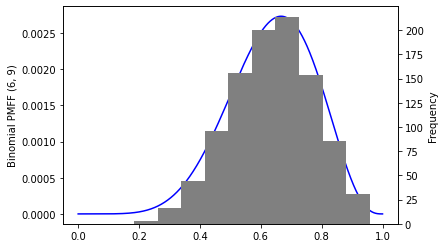

In [27]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

p_grid = np.linspace(0, 1, 1000)
prior = np.ones(1000)
b = binom(9, p_grid)
likelihood = b.pmf(6)
posterior = likelihood * prior
posterior = posterior / sum(posterior)

np.random.seed(100)
samples = np.random.choice(p_grid, p=posterior, size=1000, replace=True)
fig, ax1 = plt.subplots()
ax1.plot(p_grid, posterior, "blue")
ax1.set_ylabel("Binomial PMFF (6, 9)")

ax2 = ax1.twinx()
ax2.hist(samples, color="gray")
ax2.set_ylabel("Frequency")
plt.show()

In [61]:
def get_posterior_probability_below(posterior, p_grid, below):
    return (posterior[p_grid <= below]).sum() / posterior.sum()

# 3E1 and 3E2
for i, b in enumerate([0.2, 0.8]):
    answer = round(get_posterior_probability_below(posterior, p_grid, b) * 100, 2)
    print("(3E{num}) % Below {b}: {ans}%".format(b=b, ans=answer, num=i + 1))

# 3E3
print("(3E3) % Between p=0.2 and p=0.8: {ans}%".format(ans=round((get_posterior_probability_below(posterior, p_grid, 0.8) - get_posterior_probability_below(posterior, p_grid, 0.2)) * 100, 2)))

# 3E4
cdf = np.cumsum(posterior / posterior.sum())
print("(3E4) 20% of posterior probability lies below {ans}".format(ans=round(p_grid[(cdf >= 0.2).argmax()], 2)))

# 3E5
print("(3E5) 20% of posterior probability lies above {ans}".format(ans=round(p_grid[(cdf >= 0.8).argmax()], 2)))

(3E1) % Below 0.2: 0.09%
(3E2) % Below 0.8: 87.97%
(3E3) % Between p=0.2 and p=0.8: 87.88%
(3E4) 20% of posterior probability lies below 0.52
(3E5) 20% of posterior probability lies above 0.76
